In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preproccesing

In [4]:
df = pd.read_csv('train.csv')
# численные признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols # все признаки кроме целевой переменной
target_col = 'Churn' # целевая переменная 

In [8]:
df = df.replace('?', np.nan) # меняем все ? на NaN
df = df.replace(' ', np.nan) # меняем все пробелы на NaN
df.isna().sum().sum() # считаем количество NaN во всем датасете

9

### Их 9, удаляем все строки содержащие NaN's и проверяем снова на наличие NaN'ов:

In [9]:
df = df.dropna()
df.isna().sum().sum()

0

### Теперь их ноль, отлично, дальше нужно преобразовать все численные данные к числам (float)

In [10]:
df[num_cols] = df[num_cols].apply(pd.to_numeric)

## Теперь оценим распределение числовых признаков:

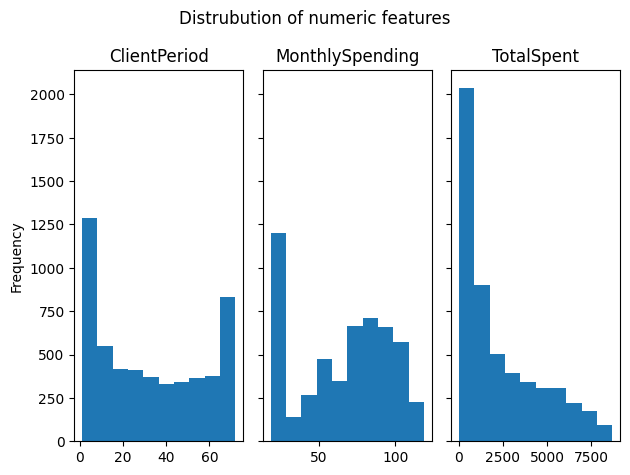

In [11]:
fig, ax = plt.subplots(1,3, sharey=True, tight_layout=True) 
ax[0].hist(df['ClientPeriod'])
ax[1].hist(df['MonthlySpending'])
ax[2].hist(df['TotalSpent'])
ax[0].set_title('ClientPeriod')
ax[1].set_title('MonthlySpending')
ax[2].set_title('TotalSpent')
ax[0].set_ylabel('Frequency')
fig.suptitle('Distrubution of numeric features')
plt.show()
None

### Фича ClientPeriod и MonthlySpending распределены более равномерно чем TotalSpent
### Теперь посмотрим на категориальные признаки:

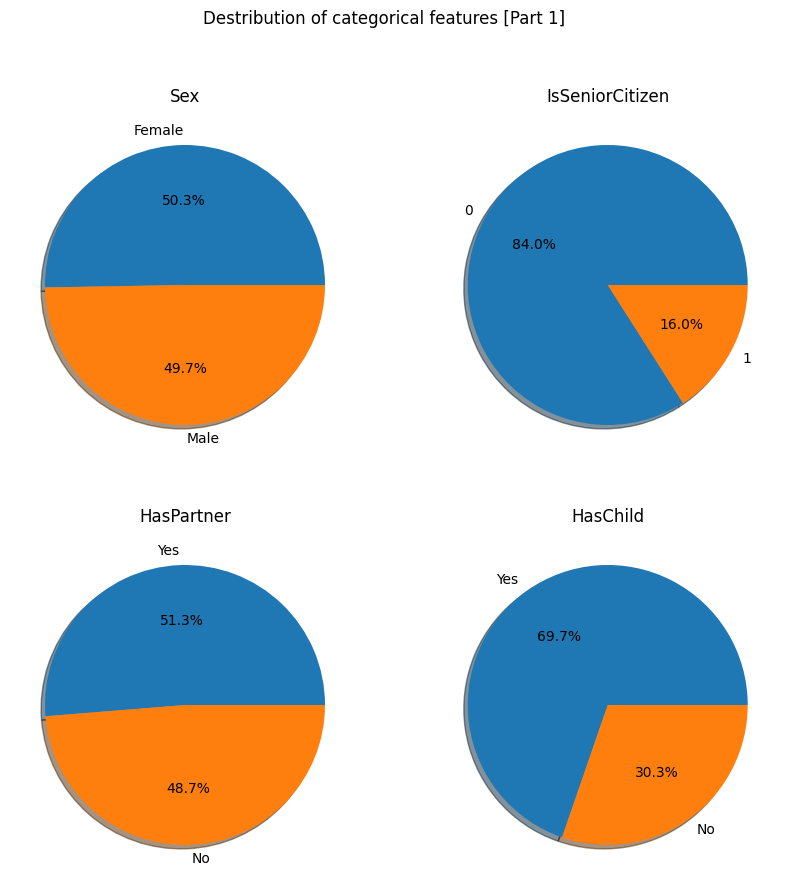

In [12]:
cat_col_values = [0] * len(cat_cols)
for i in range(len(cat_cols)):
    cat_col_values[i] = [j for j in df[cat_cols[i]].value_counts()]
cat_col_labels = [0] * len(cat_cols)
for i in range(len(cat_cols)):
    cat_col_labels[i] = set(df[cat_cols[i]].tolist()) 
ctr = 0 
fig, ax = plt.subplots(2,2, figsize=(10,10))
fig.suptitle('Destribution of categorical features [Part 1]')

for i in range(2):
    for j in range(2):
        ax[i,j].pie(cat_col_values[ctr], labels=cat_col_labels[ctr], autopct='%.1f%%', shadow=True, radius=1)
        ax[i,j].set_title(cat_cols[ctr])
        ctr += 1

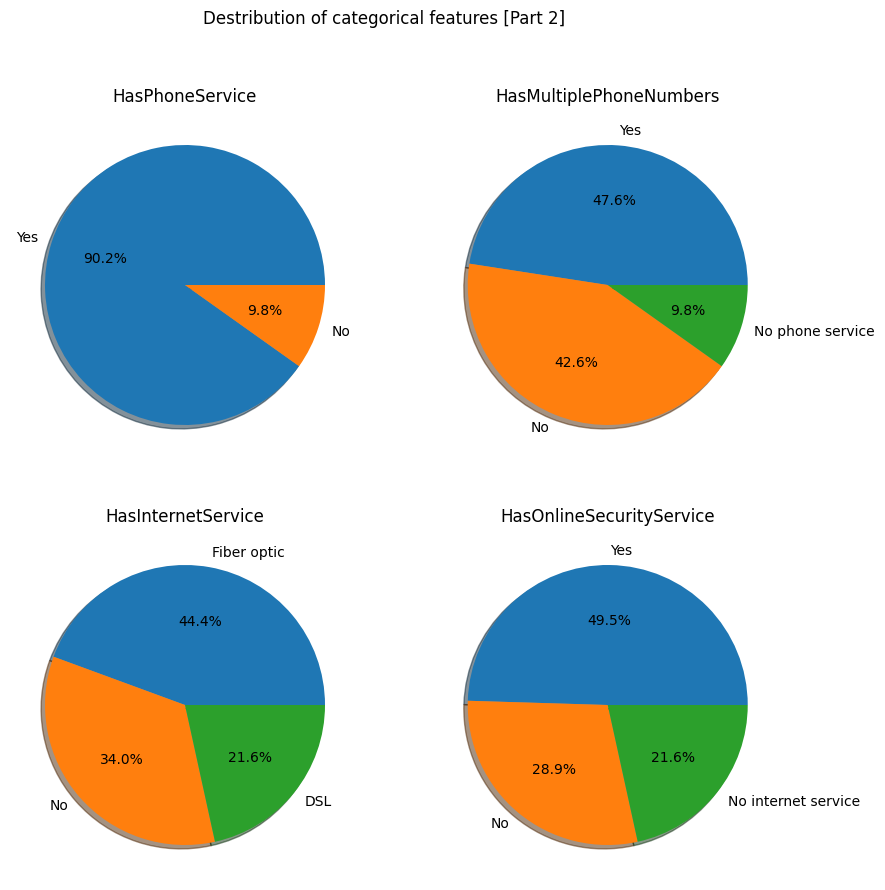

In [13]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

fig.suptitle('Destribution of categorical features [Part 2]')
for i in range(2):
    for j in range(2):
        ax[i,j].pie(cat_col_values[ctr], labels=cat_col_labels[ctr], autopct='%.1f%%', shadow=True, radius=1)
        ax[i,j].set_title(cat_cols[ctr])
        ctr += 1

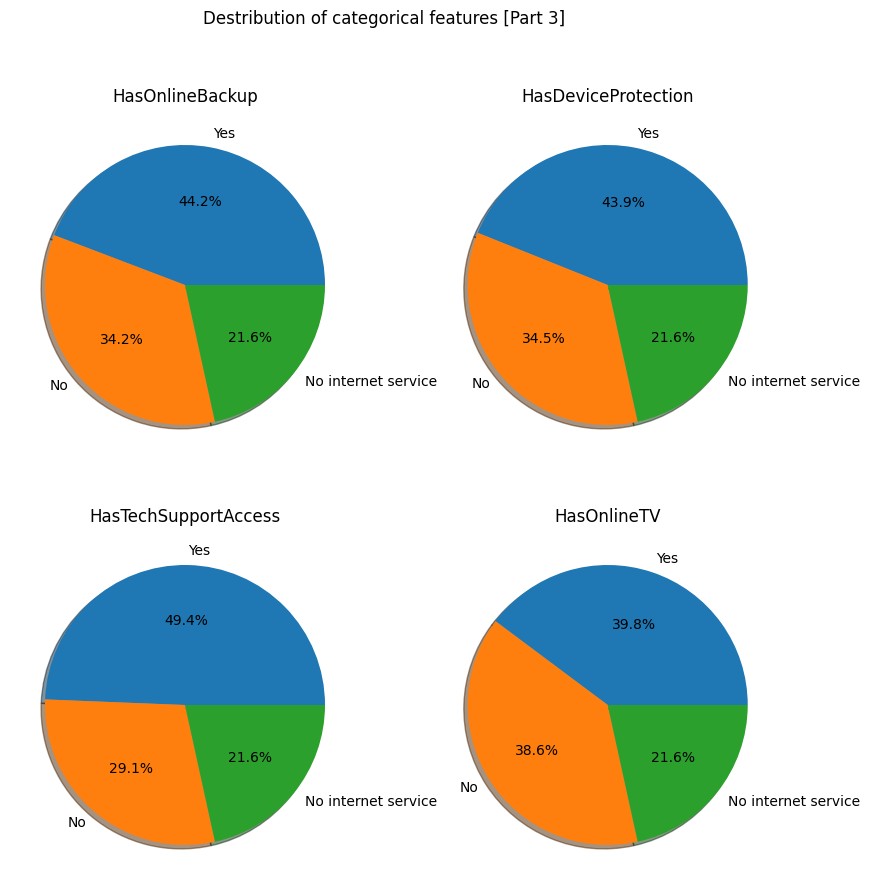

In [14]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
 
fig.suptitle('Destribution of categorical features [Part 3]')
for i in range(2):
    for j in range(2):
        ax[i,j].pie(cat_col_values[ctr], labels=cat_col_labels[ctr], autopct='%.1f%%', shadow=True, radius=1)
        ax[i,j].set_title(cat_cols[ctr])
        ctr += 1

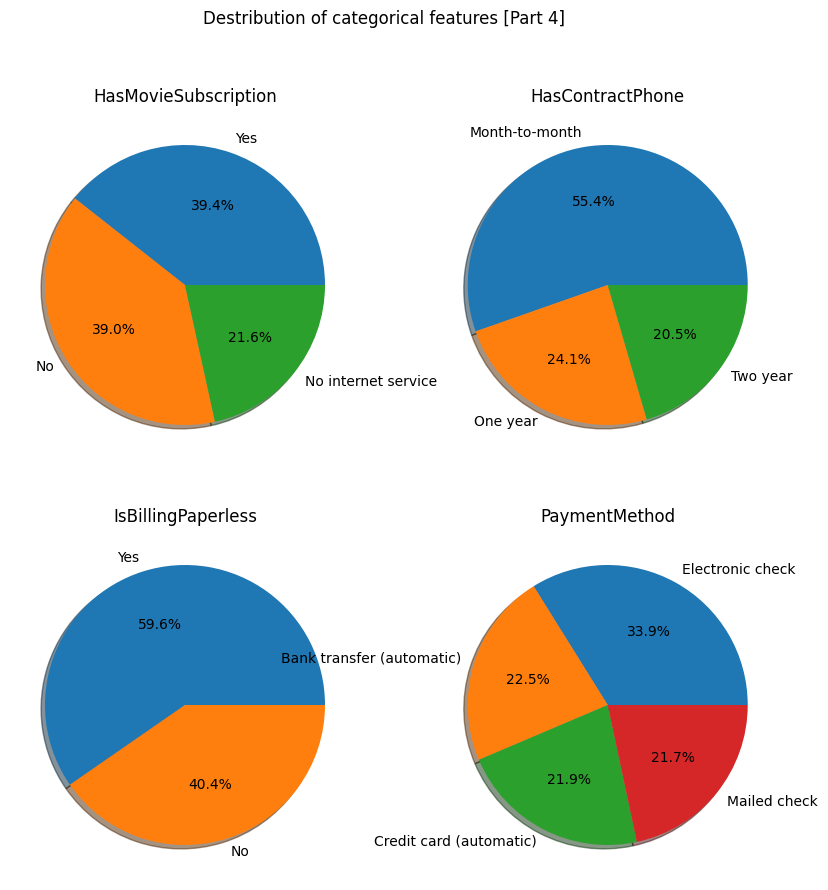

In [15]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
 
fig.suptitle('Destribution of categorical features [Part 4]')
for i in range(2):
    for j in range(2):
        ax[i,j].pie(cat_col_values[ctr], labels=cat_col_labels[ctr], autopct='%.1f%%', shadow=True, radius=1)
        ax[i,j].set_title(cat_cols[ctr])
        ctr += 1

### HasPhoneService и IsSeniorCitizen распределены крайне неравномерно и по хорошему требуют какой то обработки, возможно даже удаления, но мы этого делать не будем:)

### Далее оценим распределение целевой переменной:

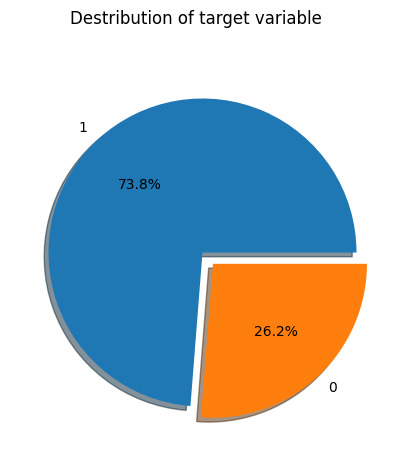

In [16]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
 
fig.suptitle('Destribution of target variable')
target_values = [df.Churn.value_counts()[0], df.Churn.value_counts()[1]]
ax.pie(target_values, labels=[1,0], autopct='%.1f%%', shadow=True, radius=1, explode = [0, 0.1])
None

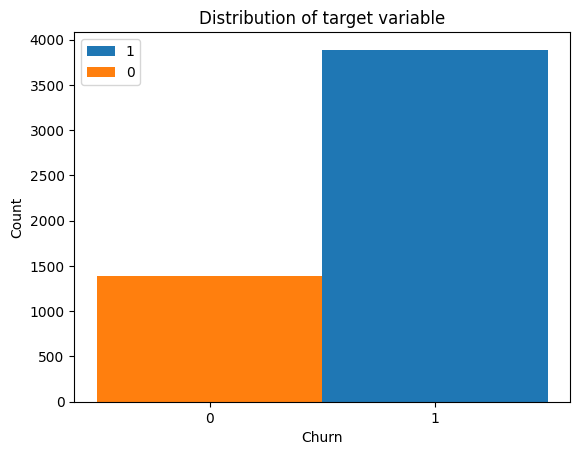

In [17]:
legend = ['1', '0']

one = np.ones(df.Churn.value_counts()[0])
zero = np.zeros(df.Churn.value_counts()[1])

x = [0,1]

plt.hist(one, bins = 1)
plt.hist(zero, bins = 1)

plt.xlabel("Churn")
plt.ylabel("Count")
plt.legend(legend)
plt.title('Distribution of target variable') 

default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)

plt.show()
None 

### Целевая переменная также распределена неравномерно, следовательно метрику accuracy использовать не стоит

### Разбиваем датафрейм на 3 подгруппы: те что содержат численные данные, категориальные, ну и собственно вектор целевой переменной:

In [18]:
numeric_data = df[num_cols]
categorical_data = df[cat_cols]
target_column = df[target_col]

### Проводим one-hot-encodind категориальных фичей:

In [19]:
dummy_features = pd.get_dummies(categorical_data) 
X = pd.concat([numeric_data, dummy_features], axis = 1)
X_with_target = pd.concat([numeric_data, dummy_features, target_column], axis = 1)
X_origin = df.iloc[:,:-1]
y = df[target_col]
print("Shape of df before one-hot-encoding: " + str(X_origin.shape))
print("Shape of df after one-hot-encoding: " + str(X.shape))

Shape of df before one-hot-encoding: (5273, 19)
Shape of df after one-hot-encoding: (5273, 45)


### Как мы видим после преобразования категориальных фичей количество признаков увеличилось с 19 до 45!

### И посмотрим на корреляцию между признаками, фокус внимания на строку Churn. Самая сильная корреляция с HasContractPhone_Month-to-month - 0.4; ClienPeriod и HasOnlineSecurityService_No по 0.35 

In [20]:
X_with_target.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\neuropromotion\AppData\Local\Temp\ipykernel_20412\2459831004.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  X_with_target.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
ClientPeriod,1.00,0.25,0.83,0.01,-0.01,0.01,-0.37,0.37,-0.15,0.15,-0.01,0.01,-0.32,-0.01,0.34,0.02,0.02,-0.04,-0.27,-0.04,0.34,-0.32,-0.04,0.36,-0.32,-0.04,0.37,-0.26,-0.04,0.32,-0.24,-0.04,0.28,-0.26,-0.04,0.29,-0.65,0.20,0.57,-0.01,0.01,0.23,0.23,-0.21,-0.22,-0.35
MonthlySpending,0.25,1.00,0.65,0.22,0.01,-0.01,-0.09,0.09,0.12,-0.12,-0.25,0.25,-0.33,-0.25,0.49,-0.17,0.79,-0.76,0.36,-0.76,0.30,0.21,-0.76,0.44,0.17,-0.76,0.48,0.32,-0.76,0.33,0.01,-0.76,0.64,0.01,-0.76,0.63,0.06,0.00,-0.07,-0.34,0.34,0.04,0.04,0.26,-0.37,0.18
TotalSpent,0.83,0.65,1.00,0.09,-0.01,0.01,-0.31,0.31,-0.05,0.05,-0.12,0.12,-0.39,-0.12,0.47,-0.05,0.36,-0.38,-0.07,-0.38,0.42,-0.18,-0.38,0.51,-0.19,-0.38,0.53,-0.08,-0.38,0.43,-0.20,-0.38,0.51,-0.21,-0.38,0.53,-0.45,0.16,0.36,-0.16,0.16,0.18,0.19,-0.06,-0.29,-0.20
IsSeniorCitizen,0.01,0.22,0.09,1.00,-0.01,0.01,-0.02,0.02,0.22,-0.22,-0.01,0.01,-0.13,-0.01,0.14,-0.10,0.25,-0.18,0.18,-0.18,-0.03,0.08,-0.18,0.07,0.10,-0.18,0.05,0.20,-0.18,-0.05,0.05,-0.18,0.10,0.03,-0.18,0.12,0.14,-0.05,-0.12,-0.15,0.15,-0.01,-0.03,0.17,-0.15,0.16
Sex_Female,-0.01,0.01,-0.01,-0.01,1.00,-1.00,0.00,-0.00,0.01,-0.01,-0.01,0.01,0.00,-0.01,0.00,0.00,0.00,-0.00,-0.01,-0.00,0.01,-0.00,-0.00,0.01,0.00,-0.00,0.00,-0.01,-0.00,0.02,-0.01,-0.00,0.01,-0.00,-0.00,0.01,0.00,-0.01,0.01,-0.02,0.02,0.01,0.01,-0.00,-0.01,0.01
Sex_Male,0.01,-0.01,0.01,0.01,-1.00,1.00,-0.00,0.00,-0.01,0.01,0.01,-0.01,-0.00,0.01,-0.00,-0.00,-0.00,0.00,0.01,0.00,-0.01,0.00,0.00,-0.01,-0.00,0.00,-0.00,0.01,0.00,-0.02,0.01,0.00,-0.01,0.00,0.00,-0.01,-0.00,0.01,-0.01,0.02,-0.02,-0.01,-0.01,0.00,0.01,-0.01
HasPartner_No,-0.37,-0.09,-0.31,-0.02,0.00,-0.00,1.00,-1.00,0.44,-0.44,0.00,-0.00,0.13,0.00,-0.13,-0.00,0.00,-0.00,0.13,-0.00,-0.14,0.13,-0.00,-0.13,0.15,-0.00,-0.15,0.11,-0.00,-0.12,0.12,-0.00,-0.12,0.12,-0.00,-0.12,0.28,-0.08,-0.25,-0.00,0.00,-0.11,-0.08,0.09,0.09,0.15
HasPartner_Yes,0.37,0.09,0.31,0.02,-0.00,0.00,-1.00,1.00,-0.44,0.44,-0.00,0.00,-0.13,-0.00,0.13,0.00,-0.00,0.00,-0.13,0.00,0.14,-0.13,0.00,0.13,-0.15,0.00,0.15,-0.11,0.00,0.12,-0.12,0.00,0.12,-0.12,0.00,0.12,-0.28,0.08,0.25,0.00,-0.00,0.11,0.08,-0.09,-0.09,-0.15
HasChild_No,-0.15,0.12,-0.05,0.22,0.01,-0.01,0.44,-0.44,1.00,-1.00,-0.01,0.01,-0.03,-0.01,0.03,-0.05,0.17,-0.15,0.20,-0.15,-0.08,0.14,-0.15,-0.02,0.13,-0.15,-0.00,0.18,-0.15,-0.06,0.10,-0.15,0.02,0.09,-0.15,0.03,0.23,-0.07,-0.20,-0.10,0.10,-0.04,-0.06,0.14,-0.06,0.16
HasChild_Yes,0.15,-0.12,0.05,-0.22,-0.01,0.01,-0.44,0.44,-1.00,1.00,0.01,-0.01,0.03,0.01,-0.03,0.05,-0.17,0.15,-0.20,0.15,0.08,-0.14,0.15,0.02,-0.13,0.15,0.00,-0.18,0.15,0.06,-0.10,0.15,-0.02,-0.09,0.15,-0.03,-0.23,0.07,0.20,0.10,-0.10,0.04,0.06,-0.14,0.06,-0.16


### Импортируем необходимые библиотеки и переходим к разбиению датасета на тренировочный и валидационный:

In [22]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier  

### Делим выборку на тестовую и тренировочную:

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size = 0.8, random_state = 42)

### Переписываем функцию из семинара)

In [25]:
def search_and_draw(X,y, model, param_name, grid, param_scale='ordinary', draw=True):
    parameters = {param_name: grid}
    
    CV_model = GridSearchCV(estimator = model,
                           param_grid=parameters,
                           cv=6,
                           scoring='roc_auc',
                           n_jobs=-1,
                           verbose=10)
    CV_model.fit(X, y)
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']
    
    if draw:
        plt.figure(figsize=(15,8))
        plt.title('choose ' + param_name)
        
        if (param_scale == 'log'):
            plt.xscale('log')
            
        plt.plot(grid, means, label='mean values of score', color='red', lw=3)
        
        plt.fill_between(grid, means - 2 * error, means + 2 * error,
                        color='green', label='filled area between errors',
                        alpha=0.5)
        legend_box = plt.legend(framealpha=1).get_frame()
        legend_box.set_facecolor('white')
        legend_box.set_edgecolor('black')
        plt.xlabel('parameter')
        plt.ylabel('roc_auc')
        plt.show()
        
    return means, error

### Создаем шаблоны моделей, будем использовать логистическую регрессию, KNN и решающее дерево. Далее передаем все параметры в функцию и запускаем

Fitting 6 folds for each of 7 candidates, totalling 42 fits


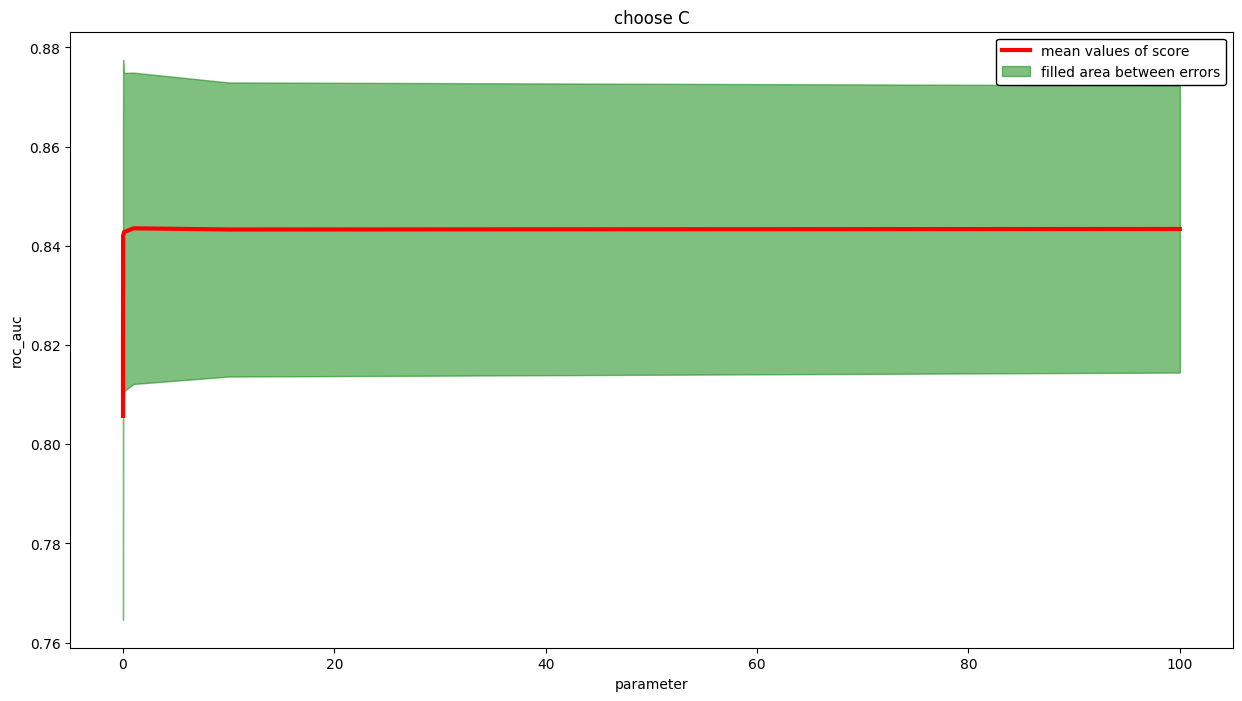

Fitting 6 folds for each of 8 candidates, totalling 48 fits


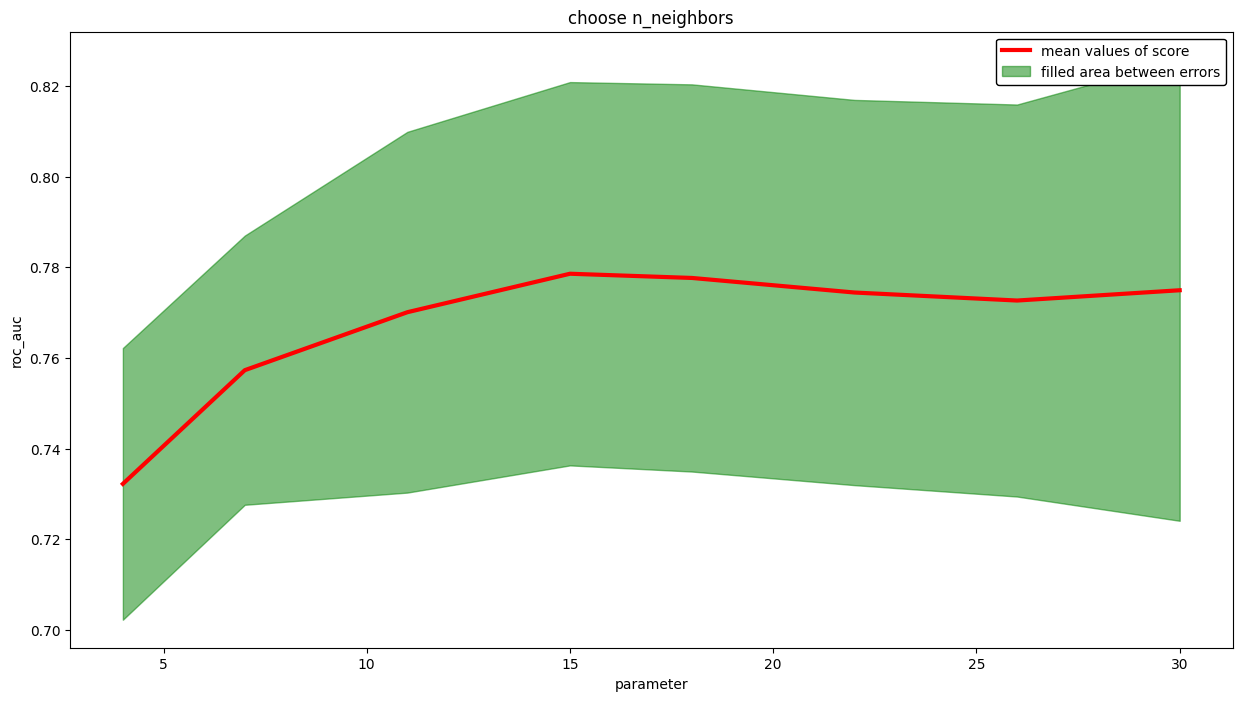

Fitting 6 folds for each of 29 candidates, totalling 174 fits


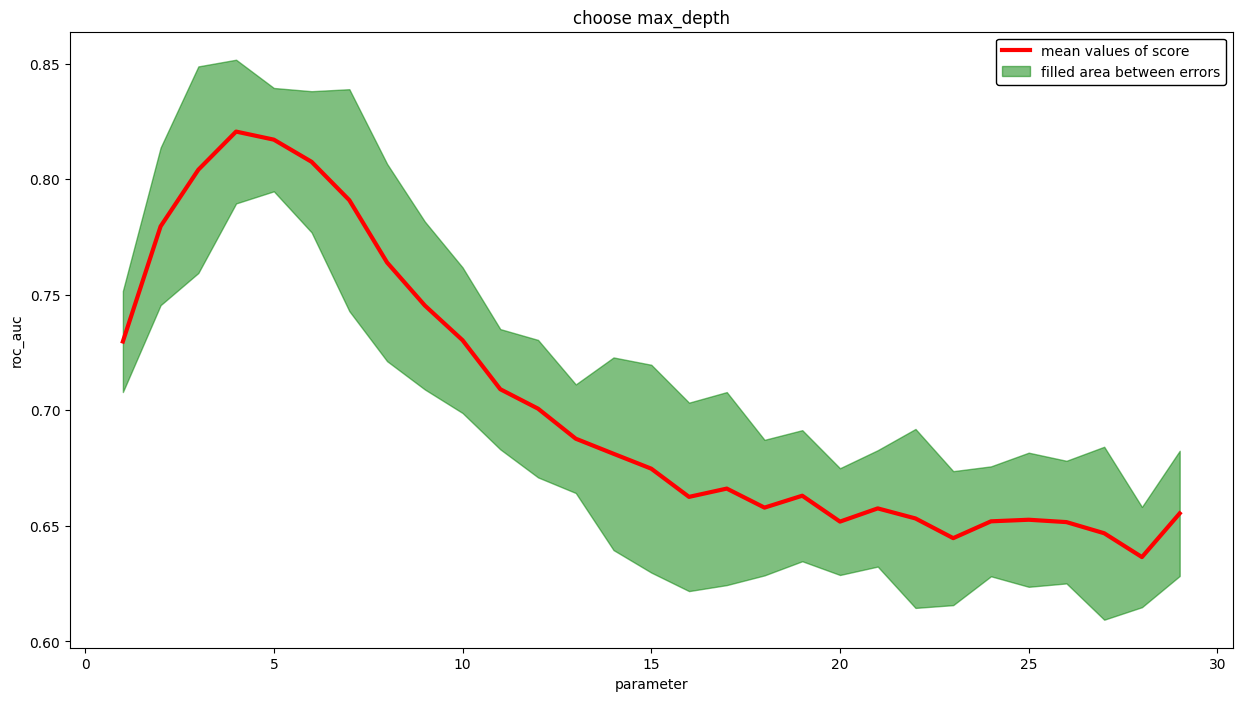

In [29]:
models = [LogisticRegression(max_iter=1000), KNeighborsClassifier(), DecisionTreeClassifier()]
param_names = ['C', 'n_neighbors', 'max_depth']
grids = [np.array([100, 10, 1, 0.1, 0.01, 0.001, 0.0001]), np.array(np.linspace(4,30,8), dtype='int'), np.arange(1,30)]
param_scales = ['ordinary', 'ordinary', 'ordinary']



for model, param_name, grid, param_scale in zip(models, param_names, grids, param_scales):
    search_and_draw(X_train, y_train, model, param_name, grid, param_scale)

### Как мы видим лучше всего с задачей справился алгоритм линейной регрессии, чуть хуже решаюшее дерево и хуже всех KNN. Причем качества алгоритма решающего дерева начало падать после глубины свыше 4-5. Посмотрим как изменяться результаты после нормировки данных 

In [48]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Fitting 6 folds for each of 7 candidates, totalling 42 fits


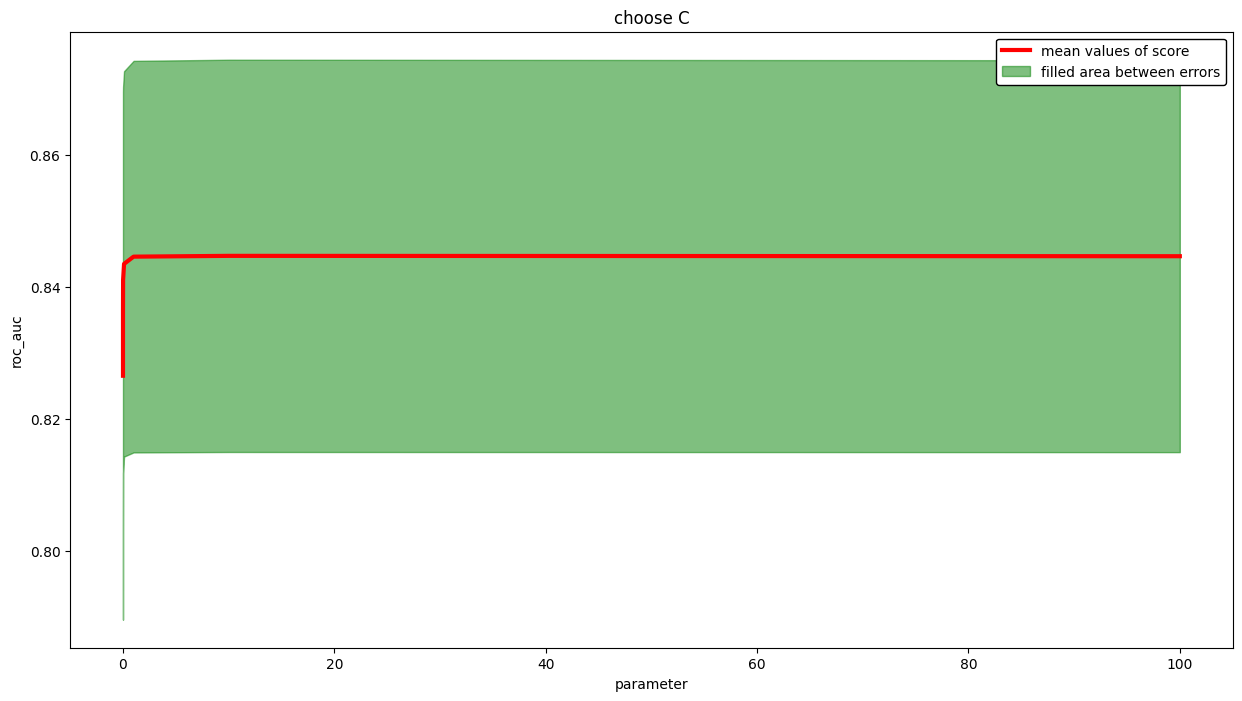

Fitting 6 folds for each of 8 candidates, totalling 48 fits


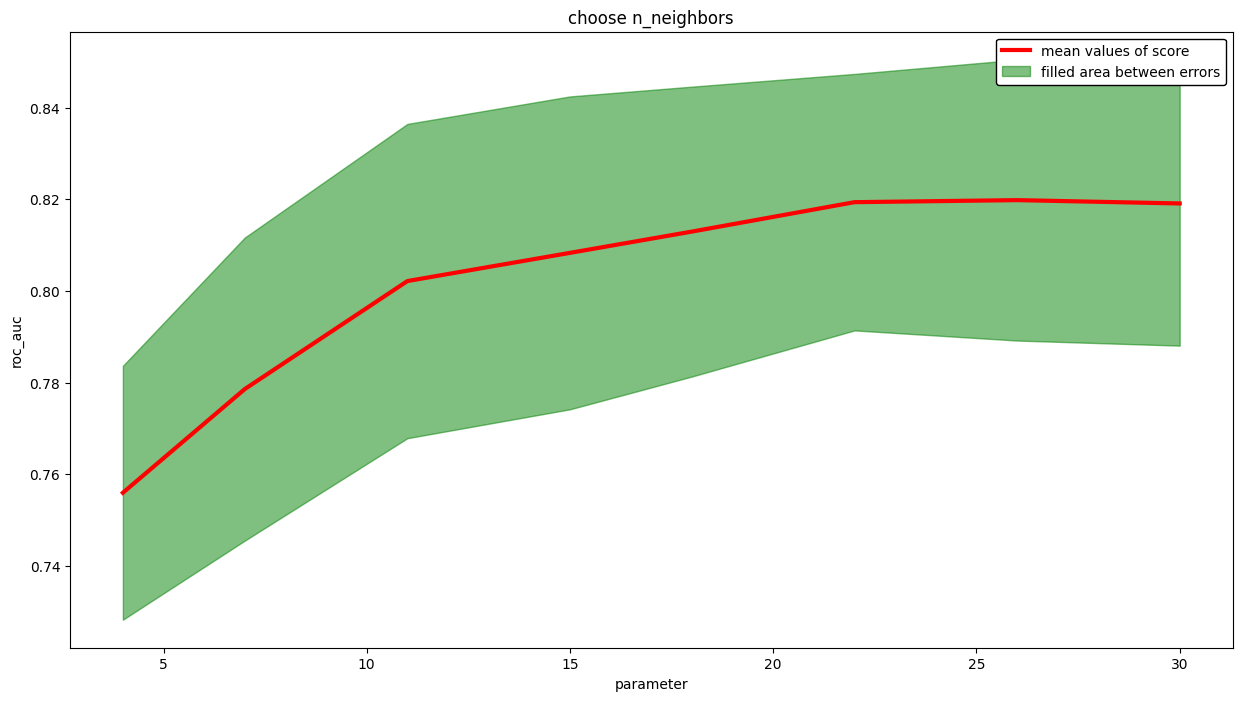

Fitting 6 folds for each of 29 candidates, totalling 174 fits


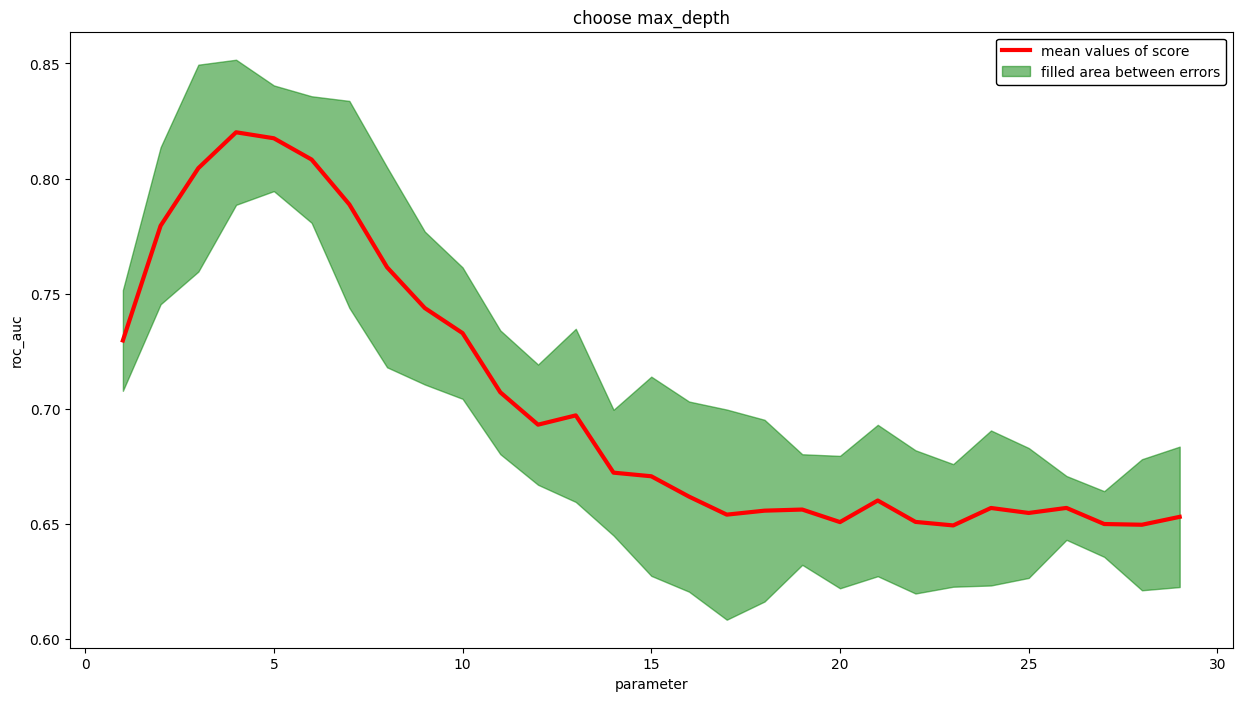

In [49]:
for model, param_name, grid, param_scale in zip(models, param_names, grids, param_scales):
    search_and_draw(X_train_scaled, y_train, model, param_name, grid, param_scale)

### Помоему ничего не поменялось ... Теперь создадим модель на базе catboost, логистическую регрессию и попробуем logistic regression CV, далее с помощью метрики roc_auc и алгоритма из семинара оценим эффективность алгоритмов:

In [63]:
from sklearn.metrics import roc_auc_score, roc_curve

In [58]:
def test_and_draw(y_train_pred, y_test_pred):
    train_auc = roc_auc_score(y_train, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)

    plt.figure(figsize=(20,10))
    plt.plot(*roc_curve(y_train, y_train_pred)[:2], label='train AUC={:.4f}'.format(train_auc))
    plt.plot(*roc_curve(y_test, y_test_pred)[:2], label='test AUC={:.4f}'.format(test_auc))
    legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
    legend_box.set_facecolor('white')
    legend_box.set_edgecolor('black')
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.show()

In [54]:
lr = LogisticRegression(max_iter=1000, C = 20)

lr.fit(X_train, y_train)
y_train_predicted_lr = lr.predict_proba(X_train)[:, 1]
y_test_predicted_lr = lr.predict_proba(X_test)[:, 1]

In [55]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(eval_metric='AUC', depth=10, iterations=250, learning_rate=0.01, silent=False) 
cb.fit(X_train, y_train)

y_train_predicted_cb = cb.predict_proba(X_train)[:, 1]
y_test_predicted_cb = cb.predict_proba(X_test)[:, 1]

0:	total: 24.7ms	remaining: 6.15s
1:	total: 48ms	remaining: 5.95s
2:	total: 72.7ms	remaining: 5.99s
3:	total: 98.4ms	remaining: 6.05s
4:	total: 123ms	remaining: 6.03s
5:	total: 149ms	remaining: 6.06s
6:	total: 176ms	remaining: 6.1s
7:	total: 185ms	remaining: 5.58s
8:	total: 192ms	remaining: 5.15s
9:	total: 216ms	remaining: 5.18s
10:	total: 244ms	remaining: 5.3s
11:	total: 284ms	remaining: 5.64s
12:	total: 293ms	remaining: 5.34s
13:	total: 311ms	remaining: 5.25s
14:	total: 338ms	remaining: 5.29s
15:	total: 363ms	remaining: 5.31s
16:	total: 377ms	remaining: 5.17s
17:	total: 401ms	remaining: 5.17s
18:	total: 424ms	remaining: 5.15s
19:	total: 448ms	remaining: 5.16s
20:	total: 474ms	remaining: 5.16s
21:	total: 500ms	remaining: 5.19s
22:	total: 527ms	remaining: 5.2s
23:	total: 553ms	remaining: 5.21s
24:	total: 577ms	remaining: 5.19s
25:	total: 602ms	remaining: 5.19s
26:	total: 626ms	remaining: 5.17s
27:	total: 649ms	remaining: 5.15s
28:	total: 680ms	remaining: 5.18s
29:	total: 704ms	remainin

240:	total: 6.07s	remaining: 227ms
241:	total: 6.1s	remaining: 202ms
242:	total: 6.13s	remaining: 177ms
243:	total: 6.16s	remaining: 151ms
244:	total: 6.18s	remaining: 126ms
245:	total: 6.18s	remaining: 101ms
246:	total: 6.21s	remaining: 75.4ms
247:	total: 6.24s	remaining: 50.3ms
248:	total: 6.26s	remaining: 25.1ms
249:	total: 6.29s	remaining: 0us


In [56]:
lr_cv = LogisticRegressionCV(max_iter=1000, scoring = 'roc_auc', refit=True) 

lr_cv.fit(X_train, y_train)
y_train_predicted_lr_cv = lr_cv.predict_proba(X_train)[:, 1]
y_test_predicted_lr_cv = lr_cv.predict_proba(X_test)[:, 1]

## Сначала посмотрим на результаты logistic regression:

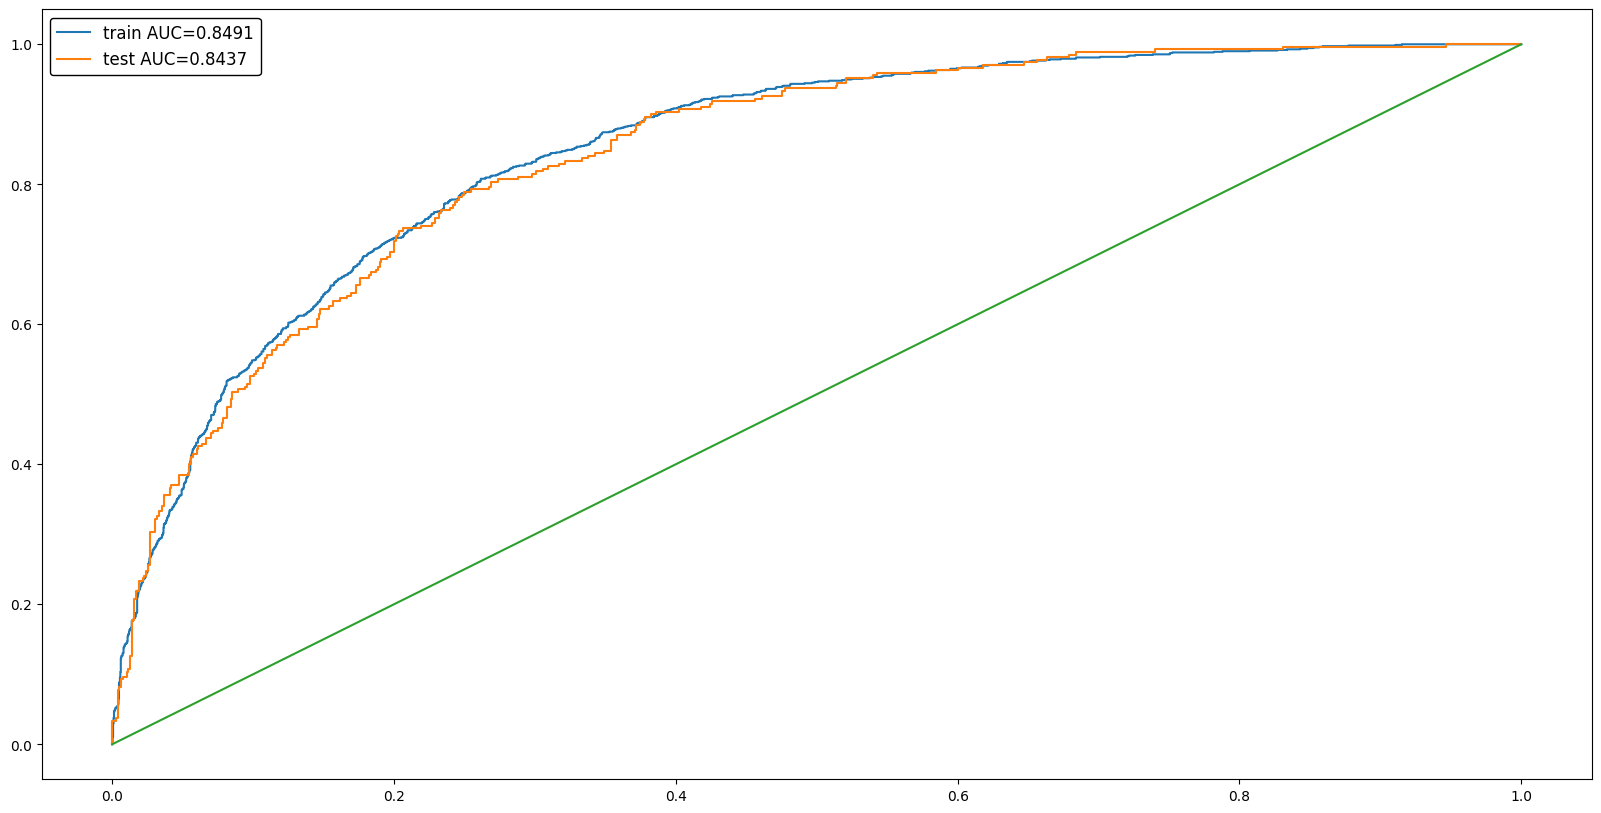

In [64]:
test_and_draw(y_train_predicted_lr, y_test_predicted_lr)

## Теперь Catboost:

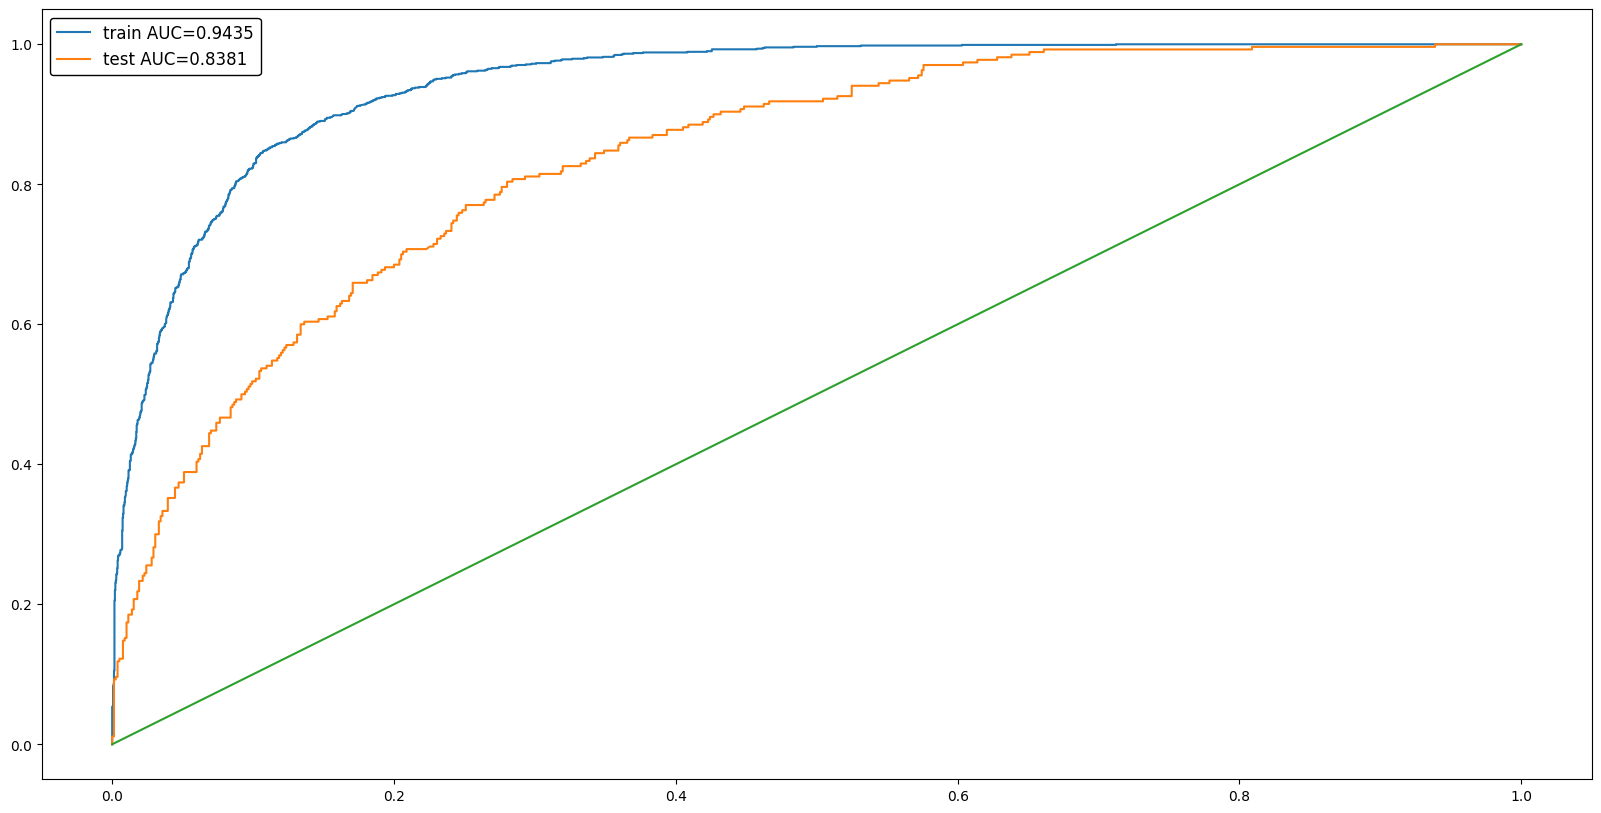

In [65]:
test_and_draw(y_train_predicted_cb, y_test_predicted_cb)

## И Log.regressionCV

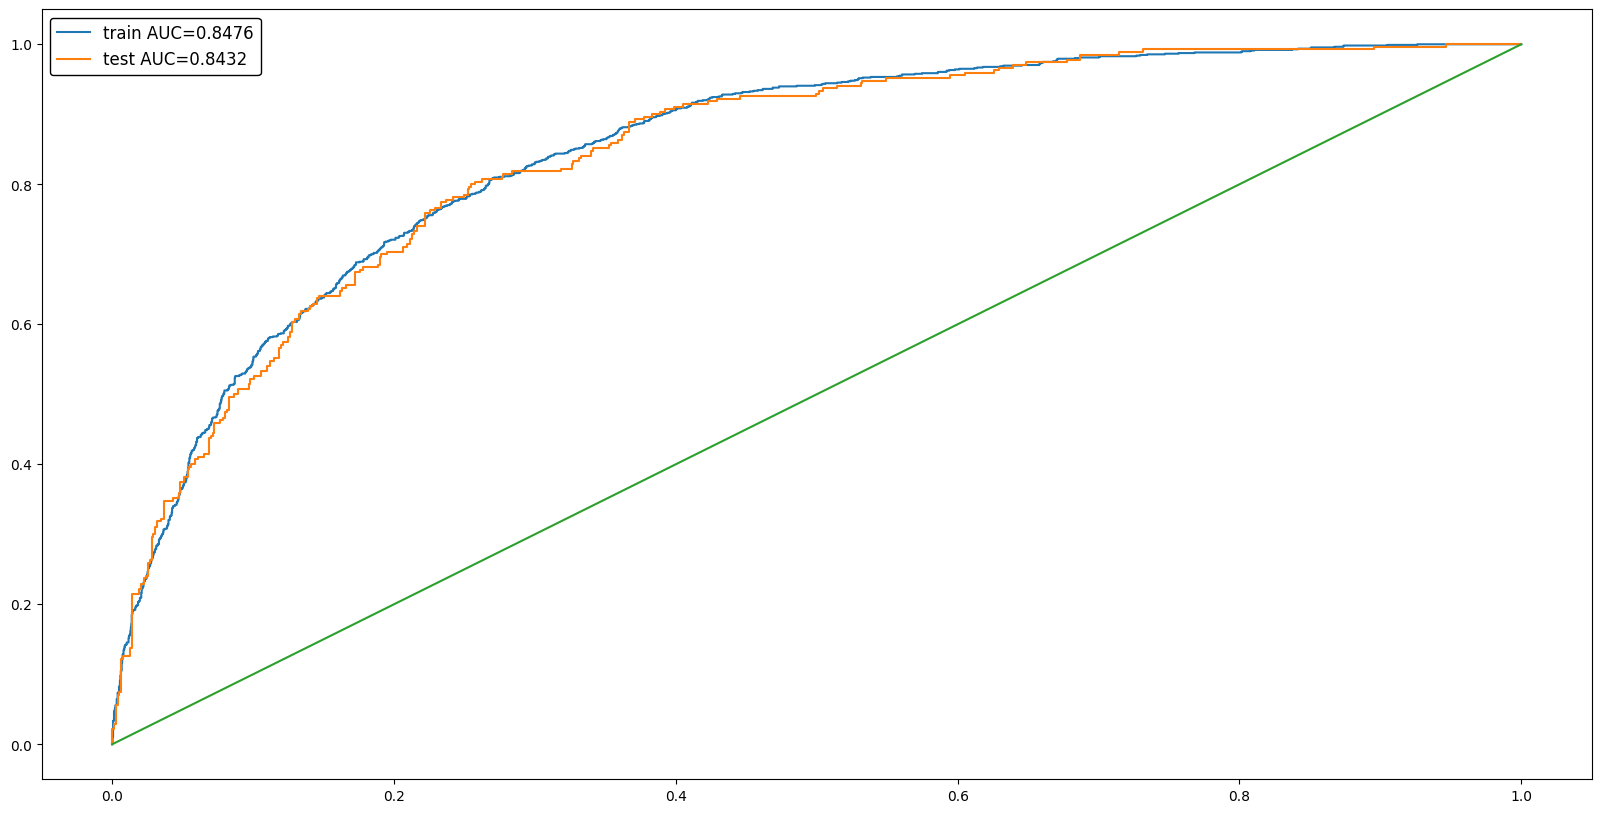

In [66]:
test_and_draw(y_train_predicted_lr_cv, y_test_predicted_lr_cv)

# К сожалению из-за каких то ошибок мне не удалось запустить алгоритм случайного леса( По итогу выходит что логистическая регрессия с параметром С большим 1 одинаково хорошо работает. Catboost выдал отличные результаты на тренировочном датасете но чуть хуже чем lr на тренировочном